
<div style="line-height:2px;border: solid orange">
    <p>
    <p style="color:blue;font-family:arial;text-align:right;font-size:20"> Visión por Computador &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Master en Ciencias de Datos e Ingeniería de Ordenadores   &nbsp;&nbsp;
  <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Rosa Mª. Rodríguez Sánchez   &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> Dpto. Ciencias de la Computación e Inteligencia Artificial. &nbsp;&nbsp;  
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> ETSIIT. Universidad de Granada   &nbsp;&nbsp;
        <p>
</div>

# Práctica 5 (Parte I) Transformada de Hotelling (Transformada discreta Karhunen-Loeve o PCA).

### Introducción
La transformada Hotelling o PCA, también conocida como transformada autovector, componente principal o transformada discreta de Karhunen-Loéve, se basa en
propiedades estadísticas de representaciones vectoriales. El objetivo es obtener una representación de las muestras con menor número de rasgos. Para ellos la transformada Hotelling lo que hace es extraer los rasgos más relevantes de un conjunto de muestras.  
<img src="pca_line.png">

Considera el conjunto de puntos 2D como se muestra en el figura de arriba. Cada dimensión se corresponde con un rasgo. Como se puede ver los puntos se alinean alrededor de la línea azul. Así una forma de reducir la dimensionalidad es representar los datos con solamente la línea azul, reduciendo la dimensionalidad de 2D a 1D.

Además, vemos que los puntos tiene una mayor varianza en la dirección del rasgo 1 (eje x) que en la dirección del rasgo 2 (eje y). Por lo tanto si conocemos la posición de un punto a lo largo de linea azul tenemos más información acerca del punto que si solamente conocemos el valor del punto para el rasgo 1 o para el rasgo 2. 

De esta forma PCA nos permitirá encontrar la dirección en la que los datos tiene la mayor varianza. De hecho si ejecutamos PCA sobre el conjunto de datos nos devuelve 2 vectores que  se denominan autovectores que son las componentes principales del conjunto de datos.
<img src="pca_eigen.png">

El tamaño de cada autovector lo indica el correspondiente autovalor. El autovalor nos informa de la varianza de los datos a lo largo de la componente principal. El origen (comienzo ) de cada autovector es el centro de todos los puntos en el conjunto. 


### Pasos a seguir para aplicar PCA
Dado un  conjunto de datos $X=\{x_1,x_2,\dots,x_n\}$  donde cada $x_i=\{x_{i1},x_{i2},\dots,x_{ip}\}$ tiene dimension $p$, queremos obtener un conjunto de datos $Y$ que se pueda representar cada muestra con un menor número de datos.
Asi los pasos a seguir para obtener el conjunto de datos $Y$ son: 
<ol>
    <li> Escribir el conjunto de datos $X$ en una matriz. Cada $x_i$ se escribe en una fila. Obteniendo una matrix $X$ de dimensión $n\times p$
    <li> Obtener la media de cada columna  como $m[j]=\frac{1}{n}\sum_{i=1}^n X[i,j]$. Siendo $m$ un vector de dimensión $p\times 1$
    <li> Obtener la matriz centrada $B= X-h m^T$. Siendo h un vector columna $n\times 1$ de unos. Siendo $B$ una matriz $n\times p$ .
    <li> Encontrar la matriz de covarianza de B como $C=\frac{1}{n-1}B^T B $  
    <li> Obtener los autovectores $V$ y autovalores $D$ de $C$. $D$ es una matriz $p\times p $ diagonal. $V$ es una metriz $p\times p$
    <li> Aplicar los autovectores $V$ a la matriz $B$, obteniendo $Y$
</ol>

    

### Ejemplo
Supongamos que tenemos el siguiente conjunto de imágenes 
<table border=0>
    <tr><td><img src='TH/a.jpg'></td><td><img src='TH/b.jpg'></td><td><img src='TH/c.jpg'></td></tr>
    <tr><td><img src='TH/d.jpg'></td><td><img src='TH/d.jpg'></td><td></td></tr>
</table>
Nuestro objetivo es reducir el número de imágenes para representar la misma información de la camioneta.
Para ello veamos como se ejecuta los pasos comentados anteriormente.
En el siguiente código se construye la matriz $X$ a partir del conjunto de imágenes de la camioneta.

In [1]:
import numpy as np
import cv2
#Creamos la matriz X

img_a=cv2.imread('TH/a.jpg',0)
img_b=cv2.imread('TH/b.jpg',0)
img_c=cv2.imread('TH/c.jpg',0)
img_d=cv2.imread('TH/d.jpg',0)
img_e=cv2.imread('TH/e.jpg',0)
#ravel reduce las dimensiones a 1 dejando la imagen como un vector
#X es una matriz donde por ejemplo en la fila 0 tiene la informacion del pixel (0,0) de cada imagen
X=np.array([np.ravel(img_a),np.ravel(img_b),np.ravel(img_c),np.ravel(img_d),np.ravel(img_e)])
X=X.T
X=X.astype('float32')
print(X.shape)

(33696, 5)


Hay que tener en cuenta que las muestras son los pixeles, y los rasgos son los valores que toman cada pixel en las 5 imágenes. A continuación obtenemos la medias.

In [2]:
m=np.mean(X, axis=0) 
print(m)

[171.20189 162.4889  175.4667   98.4562  130.71922]


Ahora construimos la matriz B

In [3]:
h= np.ones((X.shape[0],1),dtype='uint8')
B=X-h*m
print(B.shape)

(33696, 5)


Obtenemos la covariaza de B

In [4]:

C=1.0/(X.shape[0]-1)*np.dot(B.T,B)
print(C.shape)

(5, 5)


Obtenemos los autovalores y autovectores

In [5]:
from numpy import linalg as LA
D, V = LA.eig(C)
print("Autovalores: ",D)
print("Autovectores: ",V)
print("Dimensiones de D",D.shape)
print("Dimensiones de V",V.shape)

Autovalores:  [1.8516230e+04 4.8013477e+02 3.7339671e+00 7.1385593e+00 8.0711403e+00]
Autovectores:  [[-0.54342335  0.5560197  -0.11980378  0.5186443   0.3349451 ]
 [-0.2738458   0.28854823  0.8433509  -0.35356244 -0.07417019]
 [-0.21292907  0.46110085 -0.50072175 -0.56655604 -0.4127217 ]
 [-0.45562533 -0.34014067  0.06059292  0.37310702 -0.7306364 ]
 [-0.6138129  -0.5284622  -0.14146554 -0.38184696  0.4220685 ]]
Dimensiones de D (5,)
Dimensiones de V (5, 5)


D son los autovalores y V son los autovectores por columna. Aplicamos la transformación a continuación

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x21ebf33cd90>)

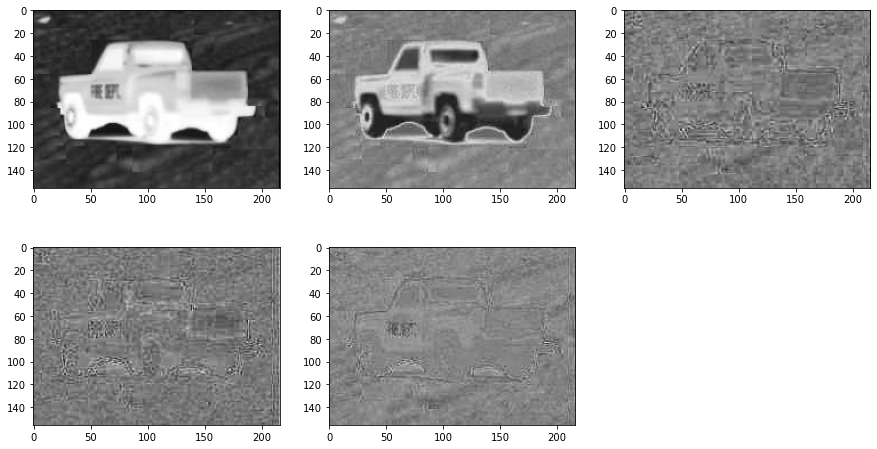

In [6]:
from matplotlib import pyplot as plt
y=np.dot(B,V)
h,w=img_a.shape
img_at=np.reshape(y[:,0],(h,w))
img_bt=np.reshape(y[:,1],(h,w))
img_ct=np.reshape(y[:,2],(h,w))
img_dt=np.reshape(y[:,3],(h,w))
img_et=np.reshape(y[:,4],(h,w))
plt.figure(figsize=(15,8))
plt.subplot(2,3,1),plt.imshow(img_at,'gray')
plt.subplot(2,3,2),plt.imshow(img_bt,'gray')
plt.subplot(2,3,3),plt.imshow(img_ct,'gray')
plt.subplot(2,3,4),plt.imshow(img_dt,'gray')
plt.subplot(2,3,5),plt.imshow(img_et,'gray')

### Usando un subconjunto de autovectores
La reconstrucción de la matriz $X$ se puede obtener como:
$X_{r}=V Y+h m^T$
Siendo h un vector columna $n\times 1$ de unos.

Supongamos que solamente  usamos un subconjunto de autovectores de $V$ formando una matriz $V_K$ que se obtiene  a partir de los K autovectores de V asociados a los  K autovalores de
mayor valor, para obtener una matriz de Kxp dimensiones. Los vectores $Y_K$ sería la submatriz de $Y$ que considera las $K\times n$ dimensionales de $Y$. Ahora la reconstruccion sería:
$\overline{X}=V_K Y_K+h m^T$. 

Se puede demostrar que el error al cuadrado medio entre $X$ y $\overline{X}$ viene dado por 
$e_K =\sum_{j=1}^p\lambda_j -\sum_{j=1}^K\lambda_j =\sum_{j=K+1}^p\lambda_j $

Ya que los autovalores  $\lambda_i$  decrecen monótonamente, también muestra que el error puede
minimizarse seleccionando los K autovectores asociados con los autovalores de mayor
valor.

### Ejercicio
En este ejercicio se pide al estudiante que aplique la transformada a un conjunto de imágenes satélite de la ciudad de Adra. Establecer el error cometido cuando se usa:

    Solamente la primera imagen correspondiente al primer autovalor
    Solamente las dos primeras imágenes correspondientes al primer y segundo autovalor
    ...
    Todos las imágenes.

Mostrar una gráfica que muestre el error cometido cuando se usan las diferentes imágenes obtenidas. Es importante desarrollar un conjunto de conclusiones sobre los datos obtenidos.



In [44]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from numpy import linalg as LA
import glob

images = glob.glob("adra/*.tif")
images = sorted(images)
images = [cv2.imread(x, 0) for x in images]
X = np.array([np.ravel(x) for x in images])
X = X.T
X = X.astype(np.float32)
m = np.mean(X, axis=0) 
h = np.ones((X.shape[0],1),dtype='uint8')
B = X-h*m
C=1.0/(X.shape[0]-1)*np.dot(B.T,B)
D, V = LA.eig(C)
indexes = np.argsort(D)[::-1]
values = D[indexes]
cumsum = np.sum(values)
relative = values / cumsum
vectores = V[indexes]
print(values.shape)
print(vectores.shape)

(256, 256)
(6,)
(6, 6)


<BarContainer object of 6 artists>

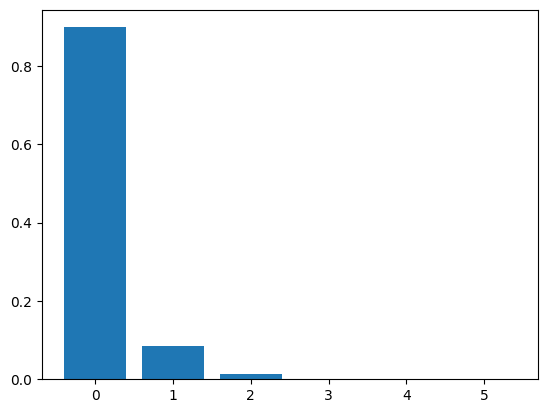

In [32]:
plt.bar(range(len(values)), relative)

Si ordenamos los autovalores de mayor a menor, sabemos qué componente es la que mayor capacidad de representación de nuestro datos tiene. 
En nuestro caso, la primera componente tiene una capacidad de representación superior al 80%, por lo cuál sería una buena aproximación de los datos.
Si seguimos añadiendo tendríamos una capacidad de representación acumulada hasta llegar al 100% de capacidad de representación al incluir todos los autovalores (autovectores) en nuesto cómputo.

(<Axes: >, <matplotlib.image.AxesImage at 0x7739f216f9d0>)

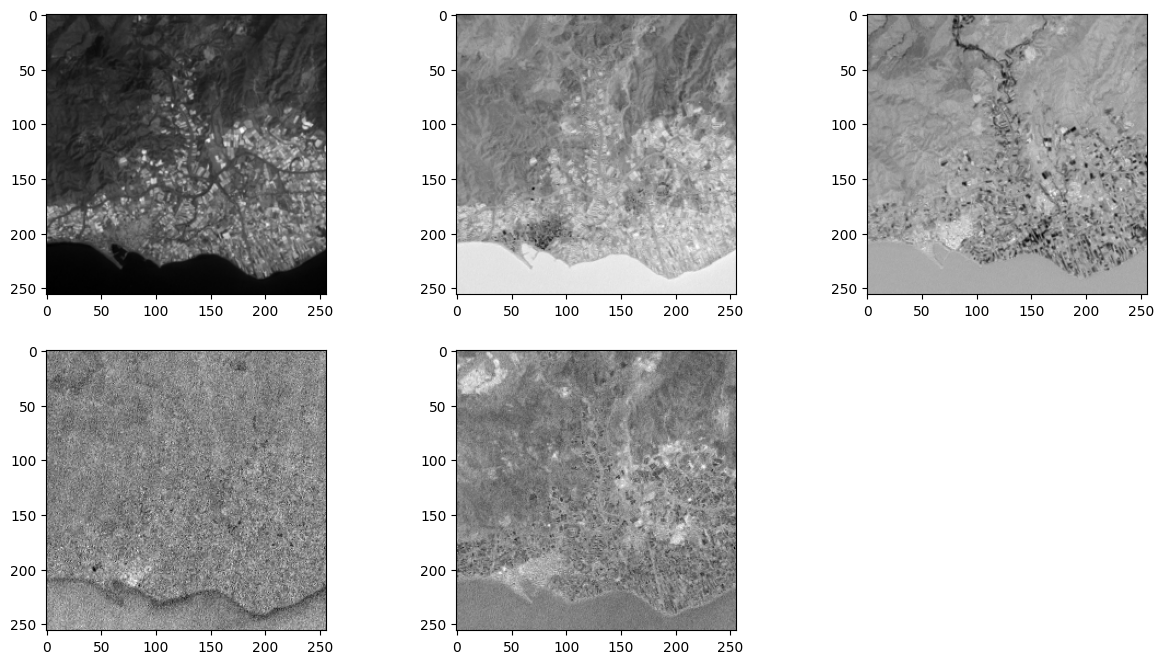

In [39]:
from matplotlib import pyplot as plt
y=np.dot(B,V)
h,w=images[0].shape
img_at=np.reshape(y[:,0],(h,w))
img_bt=np.reshape(y[:,1],(h,w))
img_ct=np.reshape(y[:,2],(h,w))
img_dt=np.reshape(y[:,3],(h,w))
img_et=np.reshape(y[:,4],(h,w))
plt.figure(figsize=(15,8))
plt.subplot(2,3,1),plt.imshow(img_at,'gray')
plt.subplot(2,3,2),plt.imshow(img_bt,'gray')
plt.subplot(2,3,3),plt.imshow(img_ct,'gray')
plt.subplot(2,3,4),plt.imshow(img_dt,'gray')
plt.subplot(2,3,5),plt.imshow(img_et,'gray')

Necesitamos al menos 2 imágenes para computar la matriz de covarianza. Así que empezaremos usando 2. Iremos subiendo y visualizando los resultados de disminuir el número de ejemplos para computar los vectores necesario para nuestra proyección y reconstrucción.

In [19]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from numpy import linalg as LA
import glob

images = glob.glob("adra/*.tif")
images = sorted(images)
images = [cv2.imread(x, 0) for x in images]
X = np.array([np.ravel(x) for x in images][:2])
X = X.T
X = X.astype(np.float32)
m = np.mean(X, axis=0) 
h = np.ones((X.shape[0],1),dtype='uint8')
B = X-h*m
C=1.0/(X.shape[0]-1)*np.dot(B.T,B)
D, V = LA.eig(C)
indexes = np.argsort(D)[::-1]
values = D[indexes]
cumsum = np.sum(values)
relative = values / cumsum
vectores = V[indexes]
print(values.shape)
print(vectores.shape)

(2,)
(2, 2)


(<Axes: >, <matplotlib.image.AxesImage at 0x7a755c4bc550>)

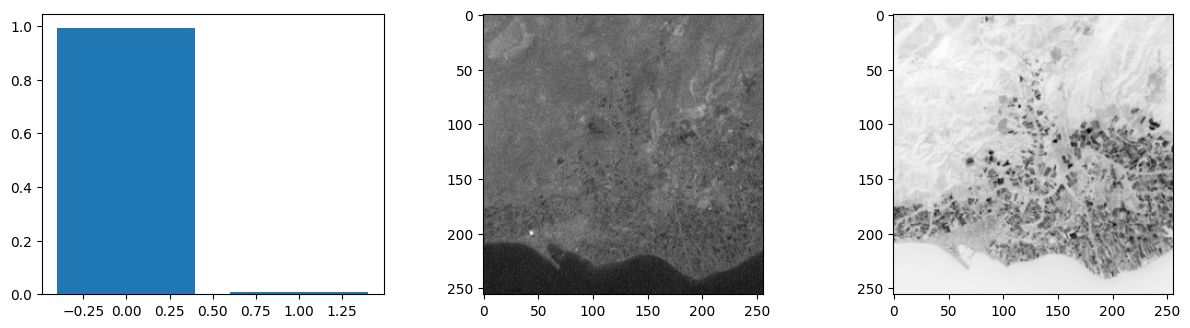

In [20]:

from matplotlib import pyplot as plt
y=np.dot(B,V)
h,w=images[0].shape
img_at=np.reshape(y[:,0],(h,w))
img_bt=np.reshape(y[:,1],(h,w))
plt.figure(figsize=(15,8))
plt.subplot(2,3,1),plt.bar(range(len(values)), relative)
plt.subplot(2,3,2),plt.imshow(img_at,'gray')
plt.subplot(2,3,3),plt.imshow(img_bt,'gray')

Observamos que con 1 vector tendríamos más del 90% de la explicabilidad de los datos. Se nota bastante pérdidas de información en las imágenes, sobre todo en la segunda. Vemos que reducir los conjunto de datos puede provocar estimaciones sub-óptimas.

In [21]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from numpy import linalg as LA
import glob

images = glob.glob("adra/*.tif")
images = sorted(images)
images = [cv2.imread(x, 0) for x in images]
X = np.array([np.ravel(x) for x in images][:3])
X = X.T
X = X.astype(np.float32)
m = np.mean(X, axis=0) 
h = np.ones((X.shape[0],1),dtype='uint8')
B = X-h*m
C=1.0/(X.shape[0]-1)*np.dot(B.T,B)
D, V = LA.eig(C)
indexes = np.argsort(D)[::-1]
values = D[indexes]
cumsum = np.sum(values)
relative = values / cumsum
vectores = V[indexes]
values = D
vectores = V
print(values.shape)
print(vectores.shape)
from matplotlib import pyplot as plt
y=np.dot(B,V)
h,w=images[0].shape
img_at=np.reshape(y[:,0],(h,w))
img_bt=np.reshape(y[:,1],(h,w))
img_ct=np.reshape(y[:,2],(h,w))
plt.figure(figsize=(15,8))
plt.subplot(2,3,1),plt.bar(range(len(values)), relative)
plt.subplot(2,3,2),plt.imshow(img_at,'gray')
plt.subplot(2,3,3),plt.imshow(img_bt,'gray')
plt.subplot(2,3,4),plt.imshow(img_ct,'gray')

(3,)
(3, 3)


(4,)
(4, 4)


(<Axes: >, <matplotlib.image.AxesImage at 0x7a75577f16c0>)

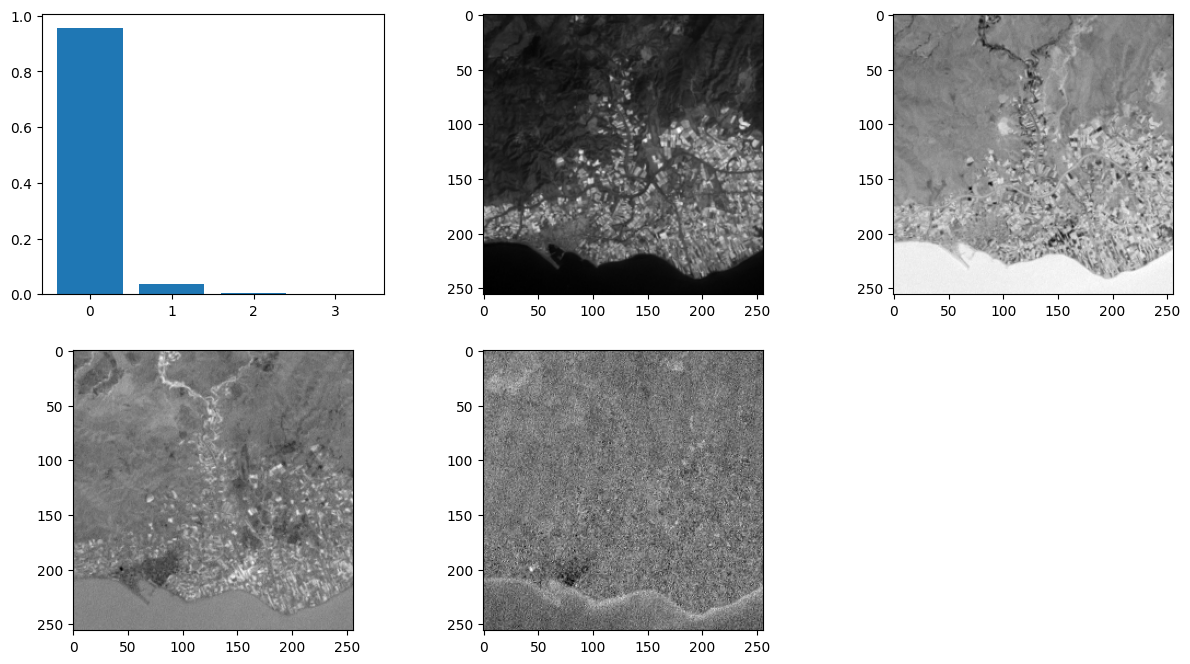

In [25]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from numpy import linalg as LA
import glob

images = glob.glob("adra/*.tif")
images = sorted(images)
images = [cv2.imread(x, 0) for x in images]
X = np.array([np.ravel(x) for x in images][:4])
X = X.T
X = X.astype(np.float32)
m = np.mean(X, axis=0) 
h = np.ones((X.shape[0],1),dtype='uint8')
B = X-h*m
C=1.0/(X.shape[0]-1)*np.dot(B.T,B)
D, V = LA.eig(C)
indexes = np.argsort(D)[::-1]
values = D[indexes]
cumsum = np.sum(values)
relative = values / cumsum
vectores = V[indexes]
values = D
vectores = V
print(values.shape)
print(vectores.shape)
from matplotlib import pyplot as plt
y=np.dot(B,V)
h,w=images[0].shape
img_at=np.reshape(y[:,0],(h,w))
img_bt=np.reshape(y[:,1],(h,w))
img_ct=np.reshape(y[:,2],(h,w))
img_dt=np.reshape(y[:,3],(h,w))
plt.figure(figsize=(15,8))
plt.subplot(2,3,1),plt.bar(range(len(values)), relative)
plt.subplot(2,3,2),plt.imshow(img_at,'gray')
plt.subplot(2,3,3),plt.imshow(img_bt,'gray')
plt.subplot(2,3,4),plt.imshow(img_ct,'gray')
plt.subplot(2,3,5),plt.imshow(img_dt,'gray')

Vemos que con 4 imágenes de ejemplo, nuestras proyecciones han cambiado de repente. Ya no tenemos una imagen que esté muy saturadas todos los valores al blanco. Estamos cada vez estimando con mayor robustez los parámetros de proyección.

En resumen hemos observado que hay un mínimo de imágenes para poder estimar los parámetros. Que pocos ejemplos conllevan a representaciones sobre-simplificadas y ruidosas. Aumentar el número de ejemplos nos permite generalizar mejor y poder detectar puntos de interes con mayor facilidad. Llegando incluso al error de proyección nulo si utilizamos todo el conjunto de datos.